# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.02.15

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

11692


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329',
             'save_folder':r'D:\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp',
             'segmentation_folder': r'\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Segmentation',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [3]:
_overwrite = False

_save_images = True

_fit_spots = True

_warp_images = True

_fov_id = 10

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 77
- Number of field of views: 161
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66C67', 'H67U2', 'H68U3', 'H69U4', 'H70U5', 'H71U6', 'H

In [ ]:
# 2. Process image into candidate spots
fov.parallel = False
fov.combo_ref_id = 0
fov._process_image_to_spots('combo', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=_save_images,
                            _warp_images=_warp_images, 
                            _fit_spots=_fit_spots,
                            _overwrite_drift=False, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

In [16]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    sel_inds = np.where(_flags)[0]
    sel_ims = []
    sel_raw_spots = []
    #
    for _ind in sel_inds:   
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

['750', '647', '561', '488']

In [140]:
reload(ia.classes.preprocess)
#dax_filename = r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H50C51\Conv_zscan_020.dax'
dax_filename = os.path.join(fov.data_folder[0], fov.annotated_folders[50], fov.fov_name)
_cls = ia.classes.preprocess.DaxProcesser(dax_filename, 
                                          CorrectionFolder=fov.correction_folder, DriftChannel=488, DapiChannel=405)
_cls._load_image(sel_channels=[750,647,561])

Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\H50C51\Conv_zscan_010.dax
-- all used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561'] in 5.029s.


In [141]:
#ref_filename = r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax'

ref_filename = os.path.join(fov.data_folder[0], fov.annotated_folders[0], fov.fov_name)
dft_ref_im = _cls._calculate_drift(ref_filename, precise_align=True)

- Loaded images for channels:['488'] in 0.903s.
+ Calculate drift with drift_channel: 488
Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\H0C1\Conv_zscan_010.dax
-- all used channels: ['750', '647', '561', '488', '405']
- Loaded images for channels:['488'] in 3.856s.
-- start aligning given source image to given reference image.
-- drift 0: [ 0.   27.27  0.06] in 1.547s.
-- drift 1: [ 0.03 27.4   0.03] in 1.593s.
-- drift 2: [-1.000e-02  2.782e+01  0.000e+00] in 1.563s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


In [117]:
print(_cls.correction_log)

_cls._corr_bleedthrough()

{'750': {'corr_bleedthrough': True, 'corr_illumination': True}, '647': {'corr_bleedthrough': True, 'corr_illumination': True}, '561': {'corr_bleedthrough': True, 'corr_illumination': True}, '488': {}}
- Correct bleedthrough already finished, skip. 


In [114]:
print(_cls.correction_log)

{'750': {'corr_bleedthrough': True}, '647': {'corr_bleedthrough': True}, '561': {'corr_bleedthrough': True}, '488': {}}


In [137]:
print(_cls.correction_log)
_cls._corr_illumination()
print(_cls.correction_log)


{'750': {'warp_chromatic': True}, '647': {}, '561': {}, '488': {}}
- Start illumination correction for channels:['750', '647', '561'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- corrected illumination for channel 750 in 10.855s.
-- corrected illumination for channel 647 in 7.855s.
-- corrected illumination for channel 561 in 7.828s.
- Finished illumination correction in 26.823s.
{'750': {'warp_chromatic': True, 'corr_illumination': True}, '647': {'corr_illumination': True}, '561': {'corr_illumination': True}, '488': {}}


In [ ]:
plt.style.use('dark_background')
visual_tools.imshow_mark_3d_v2([_cls.im_750, _cls.im_647, _cls.im_561], )

array([  50, 2048, 2048])

In [144]:
#%%time
reload(ia.io_tools.load)
print(_cls.correction_log)

_cls._warp_image(correction_channels=['750','647'], save_attrs=False)

print(_cls.correction_log)

{'750': {'warp_drift': True, 'warp_chromatic': True}, '647': {'warp_drift': True, 'warp_chromatic': True}, '561': {}, '488': {}}
- Warp drift and chromatic already finished, skip. 
{'750': {'warp_drift': True, 'warp_chromatic': True}, '647': {'warp_drift': True, 'warp_chromatic': True}, '561': {}, '488': {}}


In [128]:
print(_cls.correction_log)


{'750': {'warp_drift': True, 'warp_chromatic': True}, '647': {}, '561': {}, '488': {}}


In [143]:
print(_cls.correction_log)
chromatic_pf = ia.io_tools.load.load_correction_profile(
    'chromatic', ['750'], correction_folder=_cls.correction_folder, im_size=_cls.image_size)
print(_cls.correction_log)

{'750': {'warp_drift': True, 'warp_chromatic': True}, '647': {'warp_drift': True, 'warp_chromatic': True}, '561': {}, '488': {}}
{'750': {'warp_drift': True, 'warp_chromatic': True}, '647': {'warp_drift': True, 'warp_chromatic': True}, '561': {}, '488': {}}


In [81]:
_cls._corr_chromatic_functions()

- Start chromatic correction for channels:['750', '647', '561'].
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048_const.pkl
-- generate chromatic_shift_function for channel: 750 in 0.000s
-- generate chromatic_shift_function for channel: 647 in 0.000s
-- generate chromatic_shift_function for channel: 561 in 0.000s
-- finish generating chromatic functions in 0.003s


In [124]:
from ImageAnalysis3.segmentation_tools.cell import segmentation_mask_2_bounding_box
reload(segmentation_tools.cell)

from ImageAnalysis3.classes.preprocess import ImageCrop,ImageCrop_3d,Spots3D
from ImageAnalysis3.classes import _image_size
reload(classes.preprocess)
#
from ImageAnalysis3.classes import partition_spots
reload(classes.partition_spots)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image

from tqdm import tqdm

segmentation_file = os.path.join(fov.segmentation_folder, 
                                 fov.fov_name.replace('.dax', '_Segmentation.hdf5'))
seg_label = classes.preprocess.DaxProcesser._LoadSegmentation(segmentation_file)

all_spots, all_cell_ids = fit_spots_by_segmentation(_cls, '750', seg_label, )

In [84]:
segmentation_file = os.path.join(fov.segmentation_folder, 
                                 fov.fov_name.replace('.dax', '_Segmentation.hdf5'))
seg_label = classes.preprocess.DaxProcesser._LoadSegmentation(segmentation_file)

-- load segmentation from: \\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Segmentation\Conv_zscan_010_Segmentation.hdf5


In [85]:
all_spots, all_cell_ids = _cls.fit_spots_by_segmentation('750', seg_label, )

  1%|▉                                                                                 | 2/166 [00:12<16:39,  6.10s/it]


In [88]:
dft_all_spots = _cls.chromatic_func_750(all_spots)

<IPython.core.display.Javascript object>


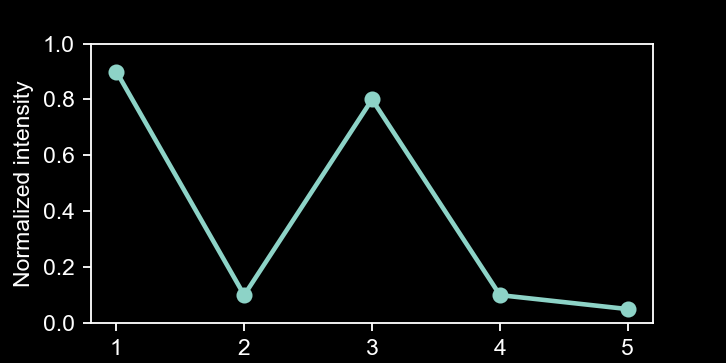

Text(0.5, 0, 'hybridization bit')

In [98]:
test_x = [0.9, 0.1, 0.8, 0.1, 0.05]
plt.figure(figsize=(4,2),dpi=150)
plt.plot(np.arange(1,6), test_x,'-o', linewidth=2)
plt.ylim([0,1])
plt.ylabel('Normalized intensity')
plt.xlabel('hybridization bit')

In [ ]:
h5py

In [67]:
import h5py

with h5py.File(fov.save_filename, 'r') as _f:
    print(_f['combo'].keys())
    
    test_im = _f['combo']['ims'][100:103]
    test_flags = _f['combo']['flags'][100:103]
    test_spots = _f['combo']['spots'][100:103]
    print(_f['combo']['channels'][100:103])

<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
[b'647' b'750' b'647']


In [71]:
test_spots[0][test_spots[0][:,0]>0]

array([[ 1.9071963e+04,  1.6887724e+01,  9.5906934e+02, ...,
         3.2976738e-01,  5.4206032e-01,  1.1066995e+03],
       [ 1.8132779e+04,  1.6657677e+01,  7.0126019e+02, ...,
         7.8404826e-01,  1.7246188e-01,  1.1264172e+03],
       [ 2.3110934e+04,  1.2417479e+01,  6.4460016e+02, ...,
         2.5308743e-01,  6.5512872e-01,  6.5675671e+02],
       ...,
       [ 9.2629767e+02,  1.7211889e+01,  3.5024149e+02, ...,
        -1.0000000e+00,  1.0000000e+00,  1.5854407e+02],
       [ 7.3150684e+02,  3.1815723e+01,  1.4869384e+03, ...,
         1.0000000e+00, -7.5120538e-01,  1.5366306e+02],
       [ 1.0026364e+03,  8.0018873e+00,  8.7715417e+02, ...,
         4.1285627e-02,  1.0000000e+00,  1.2587227e+02]], dtype=float32)

In [74]:
test_spots[0][0]

array([1.9071963e+04, 1.6887724e+01, 9.5906934e+02, 8.4911609e+02,
       1.0014683e+04, 1.3153931e+00, 1.7860968e+00, 1.9890697e+00,
       3.2976738e-01, 5.4206032e-01, 1.1066995e+03], dtype=float32)

In [64]:
test_flags

array([2, 0, 0], dtype=uint8)

<IPython.core.display.Javascript object>


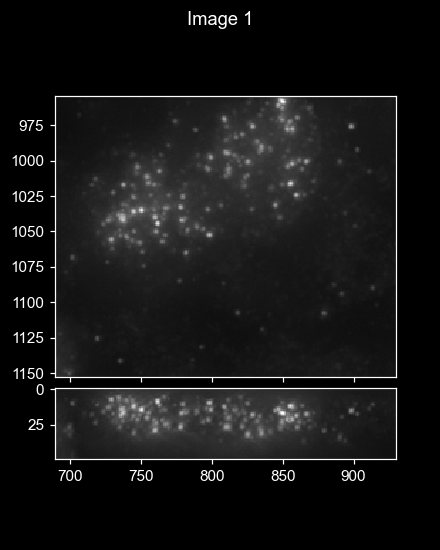

In [62]:
visual_tools.imshow_mark_3d_v2(test_im, )

In [86]:
ref_save_filename = r'\\mendel\Mendel_SSD1\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp\Conv_zscan_010.hdf5'
with h5py.File(ref_save_filename, 'r') as _f:
    combo_ids = _f['combo']['ids'][:]
    _ind = list(combo_ids).index(117)
    combo_spots = _f['combo']['spots'][_ind]
    combo_spots = combo_spots[combo_spots[:,0]>0]
    print(_f['combo']['spots'][_ind,0] - _f['combo']['raw_spots'][_ind,0])

[ 0.         -0.27196217 28.656982    0.37561035  0.          0.
  0.          0.          0.          0.          0.        ]


<IPython.core.display.Javascript object>


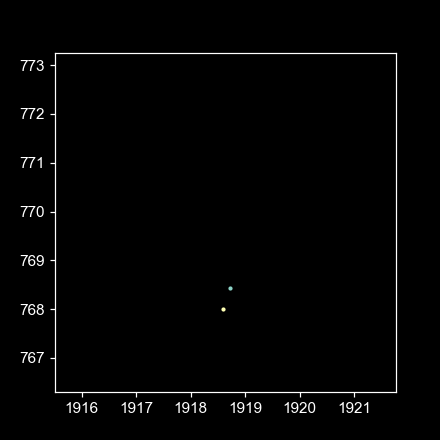

(0.0, 2048.0)

In [89]:
plt.figure(figsize=(4,4))
#plt.scatter(all_spots[:,3], all_spots[:,2])
plt.scatter(combo_spots[:,3], combo_spots[:,2], s=3)
plt.scatter(dft_all_spots[:,3], dft_all_spots[:,2], s=3)

plt.xlim([0,2048])
plt.ylim([0,2048])

In [48]:
import pandas as pd
import re
info_df = pd.read_csv(os.path.join(fov.analysis_folder, 'Color_Usage.csv'))

In [49]:
_fd = os.path.basename(os.path.dirname(_cls.filename))

In [52]:
_hyb_info_df = info_df.loc[info_df['Hyb']==_fd]

In [53]:
for _channel in _cls.channels:
    _info = _hyb_info_df[_channel].values[0]
    match_result = re.search(r'(?P<DataType>[clduvmrgp])(?P<Bit>[0-9]+)', _info)
    if match_result is not None:
        print(match_result['DataType'], match_result['Bit'])
    print(match_result)

c 117
<re.Match object; span=(0, 4), match='c117'>
c 118
<re.Match object; span=(0, 4), match='c118'>
c 173
<re.Match object; span=(0, 4), match='c173'>
None


In [37]:
_hyb_info_df

,Hyb,750,647,561,488,405
50,H50C51,c117,c118,c173,beads,NaN


In [447]:
match_result['DataType'], match_result['Bit']


('c', '117')

'c117'

In [369]:
re.search

-- partition barcodes for 160 spots


100%|█████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 22840.91it/s]


In [371]:
np.sum(_kept_flg>0)

160

In [74]:
type(dft_all_spots)

numpy.ndarray

<IPython.core.display.Javascript object>


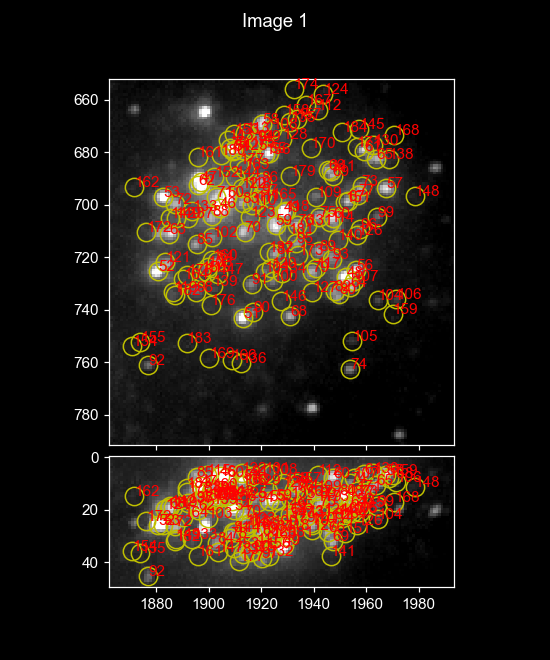

In [90]:
coord_dict = {
    'coords':np.fliplr(all_spots[:300,1:4]),
    'class_ids':np.zeros(len(all_spots[:300]),dtype=np.int32),
}
fig = plt.figure(figsize=(5,6))
visual_tools.imshow_mark_3d_v2([_cls.im_750,_cls.im_750], fig=fig, given_dic=coord_dict)

-- start fitting spots in channel:750, 120 seeded with th=500, 120 fitted in 3.952s.


In [92]:
_cls._FindImageSize(_cls.filename)

-- all used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]


array([  50, 2048, 2048])

In [93]:
_cls._LoadInfFile(_cls.filename.replace('.dax','.inf'))

{'binning': '1 x 1',
 'data type': '16 bit integers (binary, little endian)',
 'frame dimensions': '2048 x 2048',
 'number of frames': '200',
 'x_start': '1',
 'x_end': '2048',
 'y_start': '1',
 'y_end': '2048'}

In [ ]:

sel_fov_ids = np.arange(19, 20) # batch1 in franklin

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    

    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    #fov.unique_ref_id = 0
    #fov._process_image_to_spots('unique', 
    #                            _load_common_reference=True, _load_with_multiple=False,
    #                            _save_images=_save_images, _warp_images=False, _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 12
- Number of field of views: 168
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66U2', 'H67U3', 'H68U4', 'H69U5', 'H70U6', 'H71U7', 

In [22]:
    fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax  in 45.859s
-- removing hot pixels for channels:['405'] in 12.828s
-- illumination correction for channels: 405, in 4.157s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 64.031s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp\Conv_zscan_020.hdf5
++ base attributes saved:['dapi_im'] in 9.732s.


array([[[ 4218,  4294,  4253, ...,  2962,  2745,  2729],
        [ 4419,  4280,  4069, ...,  2823,  2773,  2756],
        [ 4437,  4364,  4095, ...,  3169,  2853,  2706],
        ...,
        [13055, 12663, 12271, ..., 11717, 11431, 12096],
        [12399, 12399, 12364, ..., 11371, 11458, 11957],
        [12675, 12668, 12558, ..., 11199, 11445, 12123]],

       [[ 4034,  3955,  3649, ...,  2890,  2715,  2756],
        [ 4031,  3771,  3982, ...,  2820,  2962,  2751],
        [ 4575,  3811,  4160, ...,  2808,  2706,  2431],
        ...,
        [12262, 12287, 11820, ..., 11874, 11510, 11588],
        [12162, 11941, 11981, ..., 11289, 11217, 11957],
        [12594, 12587, 12482, ..., 11694, 11697, 11949]],

       [[ 4221,  4142,  3885, ...,  2790,  2557,  2731],
        [ 3923,  3503,  4025, ...,  2659,  2631,  2526],
        [ 3995,  4041,  3800, ...,  2575,  2678,  2606],
        ...,
        [13055, 12738, 12047, ..., 11556, 11990, 11842],
        [12399, 12856, 11752, ..., 12011, 114

In [ ]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])



    for _id in sel_ids:
        _ind = _ids.index(_id)


In [6]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    

In [7]:
_flags

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])

with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    sel_ims = []
    sel_raw_spots = []
    for _id in sel_ids:
        _ind = _ids.index(_id)
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [17]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_raw_spots):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))
    

In [32]:
plt.style.use('dark_background')

In [33]:
visual_tools.imshow_mark_3d_v2(sel_ims, given_dic=coord_dict, image_names=sel_inds)

NameError: name 'sel_ims' is not defined

In [20]:
_bits = np.array(_ids)[sel_inds]

<IPython.core.display.Javascript object>


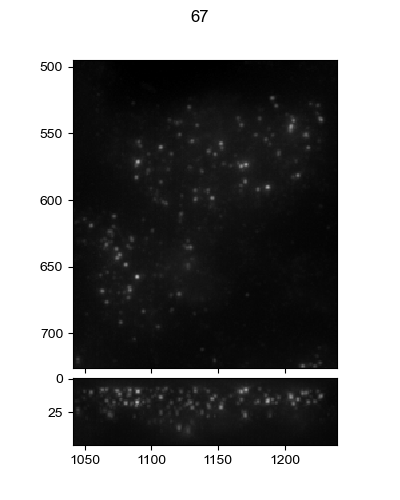

In [29]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im]+list(sel_ims), 
                               image_names=['dapi']+list(_bits), 
                               min_max_default=[2000,15000])